In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np


%matplotlib inline
pd.set_option('display.max_columns', None)

Import CSV

In [2]:
df = pd.read_csv('..//data/cleaned_pets.csv')

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_44696\3667737777.py:1: DtypeWarning: Columns (17,18,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..//data/cleaned_pets.csv')


In [3]:
print(df.shape)
#df.info()

(34009, 42)


Additional Cleaning

In [4]:
# Convert to datetime
df['published_at'] = pd.to_datetime(df['published_at'])
df['status_changed_at'] = pd.to_datetime(df['status_changed_at'])
df['published_date'] = pd.to_datetime(df['published_date'])
df['status_change_date'] = pd.to_datetime(df['status_change_date'])

In [5]:
#df.info()

In [6]:
# Define function to switch dtypes to string
def string_clean(column):
    x = df[column].astype('string')
    return x

# Switch objects to strings
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = string_clean(column)

In [7]:
#df.info()

In [8]:
# Create dataframes to use for analysis
available = df[df['status'] == 'adoptable']
adopted = df[(df['year_status_change'] == 2023) & (df['status'] == 'adopted')]

In [9]:
print('available pets:', available['id'].count())
print('adopted pets:', adopted['id'].count())

available pets: 3127
adopted pets: 29735


# What are the key factors influencing the adoption dynamics?

## Q1. What is the overall adoption rate for 2023?

In [10]:
# Count # of adoptions in adopted df and df - divide adopted by all pets and multiply * 100
overall_ar = round((adopted['id'].count() / df['id'].count()) * 100, 2)

print('Average Adoption Time:', overall_ar, '%')

Average Adoption Time: 87.44 %


## Q2. Are there specific species and breeds that are more likely to be adopted?

#### What is the adoption rate by species? 

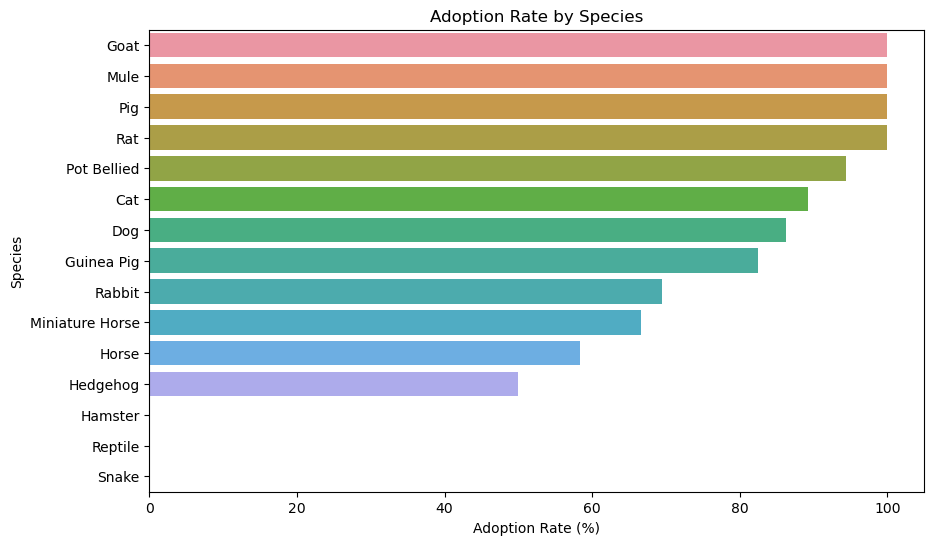

In [11]:
# Group and count for adopted and total
total_by_species = df.groupby('species')['id'].count().reset_index(name='count_total')
adopted_by_species = adopted.groupby('species')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
species_ar = pd.merge(total_by_species, adopted_by_species, on='species', how='outer')

# Add new column and calculate adoption rate + round
species_ar['adoption rate %'] = round((species_ar['count_adopted'] / species_ar['count_total']) * 100, 2)
species_ar = species_ar.sort_values('adoption rate %', ascending=False)

# Plot in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='species', data=species_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Species')
plt.title('Adoption Rate by Species')
plt.show()

#### What is the adoption rate by age, gender, and size?

Age

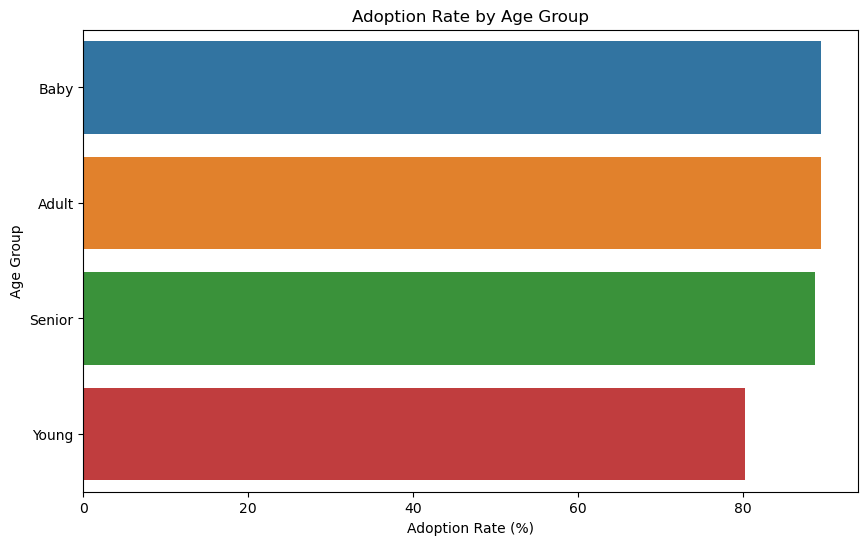

In [12]:
# Group and count for adopted and total
total_by_age = df.groupby('age')['id'].count().reset_index(name='count_total')
adopted_by_age = adopted.groupby('age')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
age_ar = pd.merge(total_by_age, adopted_by_age, on='age', how='outer')

# Add new column and calculate adoption rate + round
age_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
age_ar = age_ar.sort_values('adoption rate %', ascending=False)

# Plot as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='age', data=age_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Age Group')
plt.title('Adoption Rate by Age Group')
plt.show()

Gender

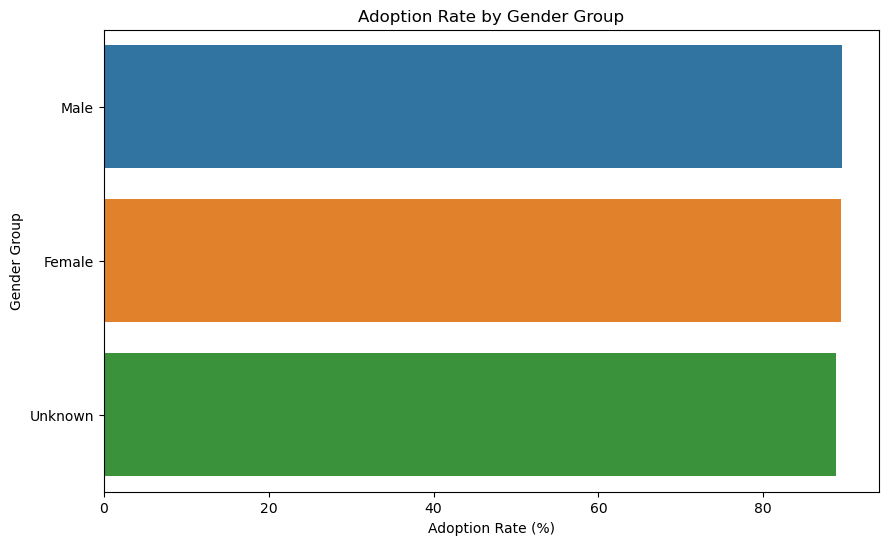

,gender,count_total,count_adopted,adoption rate %
1,Male,16647,14514.0,89.53
0,Female,17359,15221.0,89.46
2,Unknown,2,NaN,88.78


In [13]:
# Group and count for adopted and total
total_by_gender = df.groupby('gender')['id'].count().reset_index(name='count_total')
adopted_by_gender = adopted.groupby('gender')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
gender_ar = pd.merge(total_by_gender, adopted_by_gender, on='gender', how='outer')

# Add new column and calculate adoption rate + round
gender_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
gender_ar = gender_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='gender', data=gender_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Gender Group')
plt.title('Adoption Rate by Gender Group')
plt.show()

gender_ar

In [14]:
df[df['gender'] == 'Unknown']

,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,published_date,status_change_date,adoption_time,month_published,day_published,year_published,month_status_change,day_status_change,year_status_change
33944,59486311.0,TN341,https://www.petfinder.com/scales-fins-others/b...,"Scales, Fins & Other",Reptile,Young,Unknown,Medium,<NA>,<NA>,Beardy,Read to the bottom to see how to adopt this be...,adoptable,2023-01-16 21:10:14+00:00,2023-01-16 21:10:13+00:00,Bearded Dragon,<NA>,False,False,Tan,<NA>,<NA>,False,False,NaN,False,False,False,False,False,Nashville,TN,37211.0,2023-01-16,2023-01-16,0.0,1.0,16.0,2023.0,1.0,16.0,2023.0
33945,59486226.0,TN341,https://www.petfinder.com/scales-fins-others/n...,"Scales, Fins & Other",Snake,Adult,Unknown,Medium,<NA>,"Friendly, Smart, Curious, Independent, Dignifi...",Nashville,Read to the bottom please to see how to adopt ...,adoptable,2023-01-16 20:54:58+00:00,2023-01-16 20:54:56+00:00,Boa,<NA>,False,False,<NA>,<NA>,<NA>,False,False,NaN,False,False,<NA>,False,False,Nashville,TN,37211.0,2023-01-16,2023-01-16,0.0,1.0,16.0,2023.0,1.0,16.0,2023.0


Size

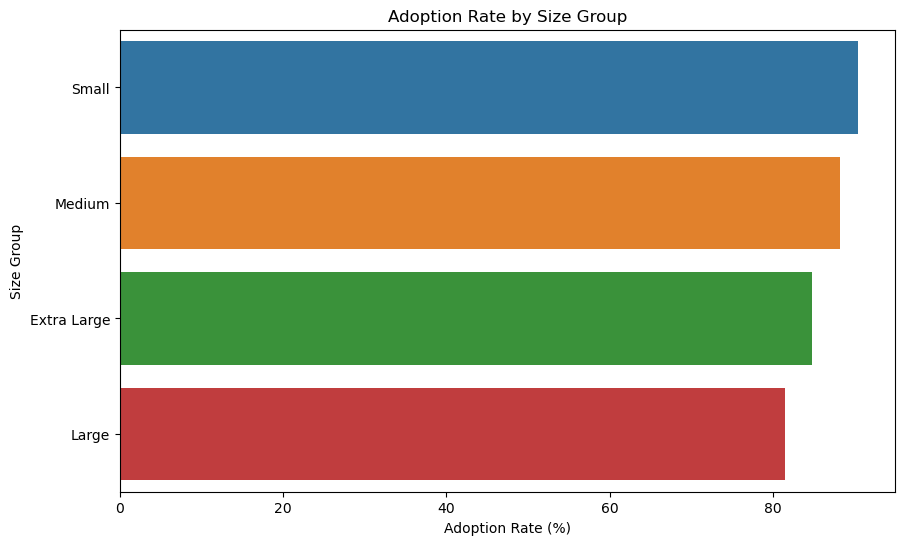

,size,count_total,count_adopted,adoption rate %
3,Small,6555,5925,90.39
2,Medium,21417,18882,88.16
0,Extra Large,301,255,84.72
1,Large,5735,4673,81.48


In [15]:
# Group and count for adopted and total
total_by_size = df.groupby('size')['id'].count().reset_index(name='count_total')
adopted_by_size = adopted.groupby('size')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
size_ar = pd.merge(total_by_size, adopted_by_size, on='size', how='outer')

# Add new column and calculate adoption rate + round
size_ar['adoption rate %'] = round((size_ar['count_adopted'] / size_ar['count_total']) * 100, 2)
size_ar = size_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='size', data=size_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Size Group')
plt.title('Adoption Rate by Size Group')
plt.show()

size_ar

## Q3. Are there patterns or trends related to how quickly an animal is adopted in TN? 

## Adoption Speed Trends

#### What is the overall average adoption speed?

In [16]:
avg_at = round(adopted['adoption_time'].mean())
print('Average Adoption Time:', avg_at, 'days')

Average Adoption Time: 17 days


#### What is the distribution of adoption time?

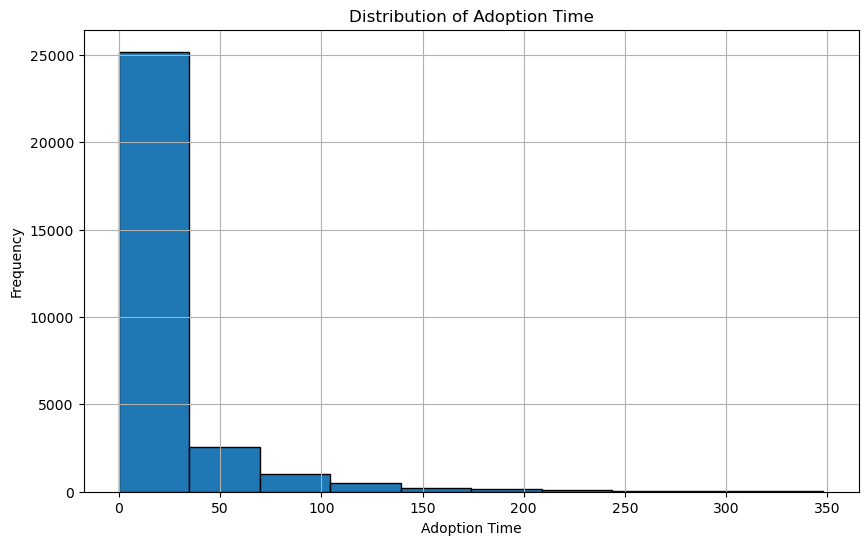

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(adopted['adoption_time'], bins=10, edgecolor='black')
plt.xlabel('Adoption Time')
plt.ylabel('Frequency')
plt.title('Distribution of Adoption Time')
plt.grid(True)
plt.show()

#### What is the distribution of time placed for adoption for pets who were not adopted in 2023?

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_44696\1040136201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available['days_available'] = (end_2023 - available['published_date']).dt.days


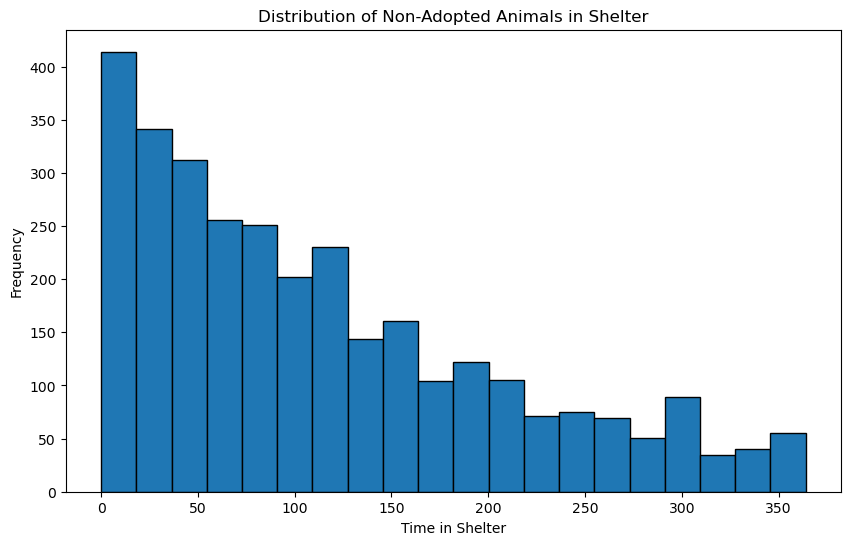

In [81]:
# Convert last day of the year to date time
end_2023 = pd.to_datetime('2023-12-31')

# create days_available column and subtract las day of the year by published date convert dt to days
available['days_available'] = (end_2023 - available['published_date']).dt.days

# Subset ids and day_available
time = available[['id', 'days_available']]

# Plot

plt.figure(figsize=(10, 6))
plt.hist(time['days_available'], bins=20, edgecolor='black')
plt.xlabel('Time in Shelter')
plt.ylabel('Frequency')
plt.title('Distribution of Non-Adopted Animals in Shelter')
plt.show()

#### What is the average adoption speed per species listed?

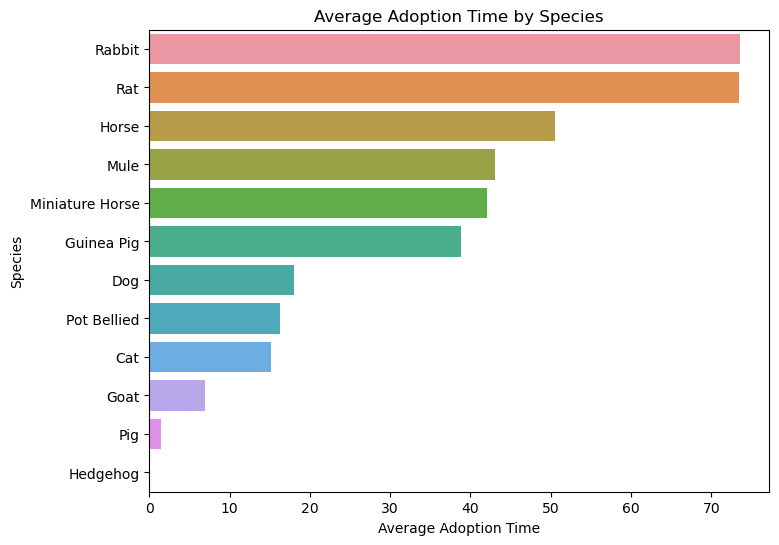

In [19]:
species_at = adopted.groupby('species')['adoption_time'].mean().reset_index(name='avg_at').sort_values('avg_at', ascending=False)

plt.figure(figsize=(8, 6))  
sns.barplot(x='avg_at', y='species', orient='h', data=species_at)
plt.xlabel('Average Adoption Time')
plt.ylabel('Species')
plt.title('Average Adoption Time by Species')
plt.show()

#### Does an animals age impact adoption speed?

Age vs Adoption Speed

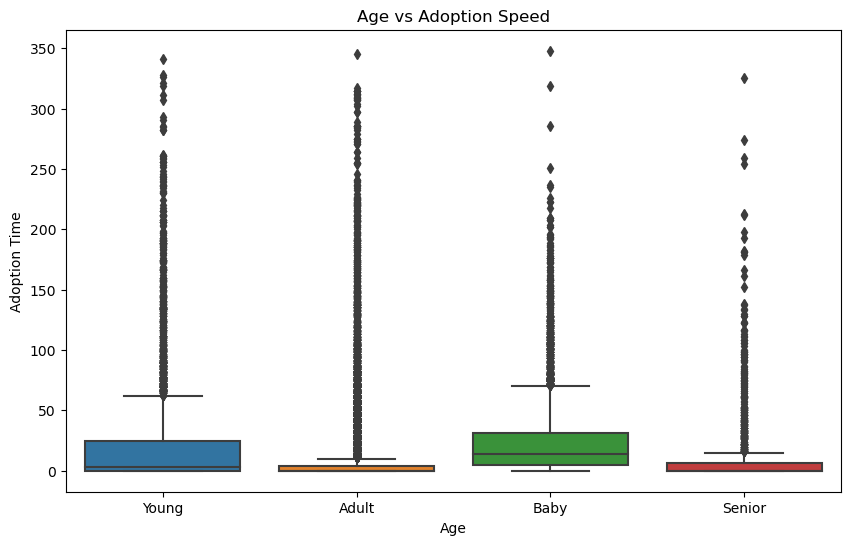

In [20]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='age', y='adoption_time', data=adopted)
plt.xlabel('Age')
plt.ylabel('Adoption Time')
plt.title('Age vs Adoption Speed')
plt.show()

#### Does an animals gender impact adoption speed?

Gender vs Adoption Speed

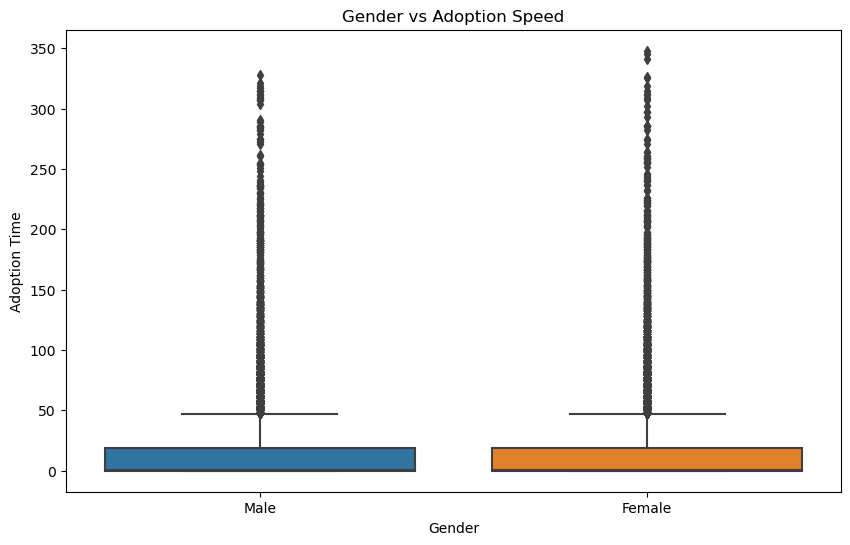

In [21]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='gender', y='adoption_time', data=adopted)
plt.xlabel('Gender')
plt.ylabel('Adoption Time')
plt.title('Gender vs Adoption Speed')
plt.show()

#### Does an animals size impact adoption speed?

Size vs Adoption Speed

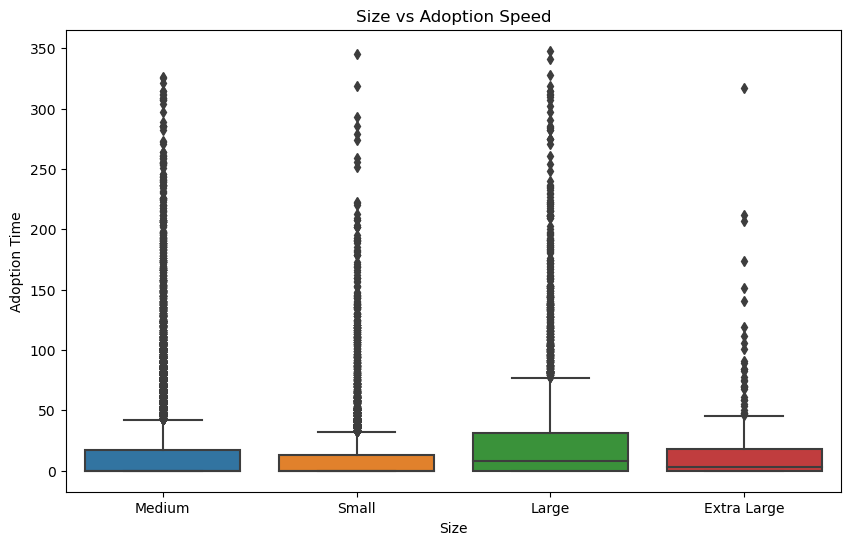

In [22]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='size', y='adoption_time', data=adopted)
plt.xlabel('Size')
plt.ylabel('Adoption Time')
plt.title('Size vs Adoption Speed')
plt.show()

### Seasonality Trends

#### Does seasonality impact adoption speed?

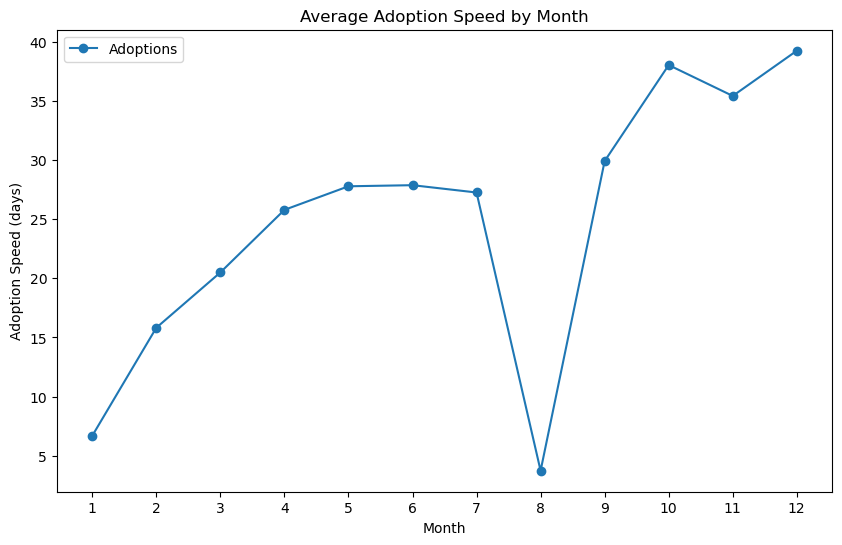

In [23]:
monthly_adoptions = adopted.groupby('month_status_change')['adoption_time'].mean()
monthly_published = df.groupby('month_published')['id'].count()

plt.figure(figsize=(10, 6))

monthly_adoptions.plot(kind='line', marker='o', label='Adoptions')
#monthly_published.plot(kind='line', marker='o')

plt.title('Average Adoption Speed by Month')
plt.xlabel('Month')
plt.ylabel('Adoption Speed (days)')
plt.xticks(range(1, 13)) 
plt.legend()

plt.show()

## Q4. What impract does seasonality have on adoptions?

#### Is there a trend in adoptions by month?

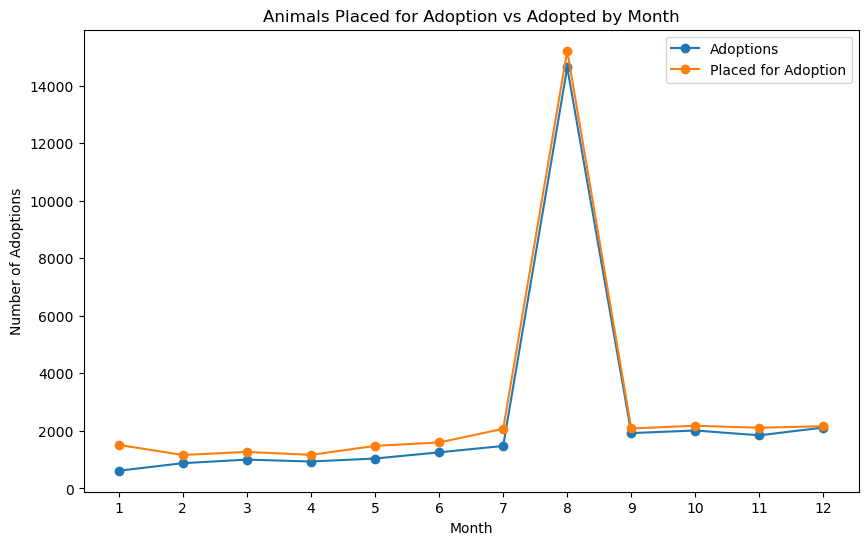

In [24]:
monthly_adoptions = adopted.groupby('month_status_change')['id'].count()
monthly_published = df.groupby('month_published')['id'].count()

plt.figure(figsize=(10, 6))

monthly_adoptions.plot(kind='line', marker='o', label='Adoptions')
monthly_published.plot(kind='line', marker='o', label='Placed for Adoption')

plt.title('Animals Placed for Adoption vs Adopted by Month')
plt.xlabel('Month')
plt.ylabel('Number of Adoptions')
plt.xticks(range(1, 13)) 
plt.legend()

plt.show()

Is there a trend in adoptions by day of the month?

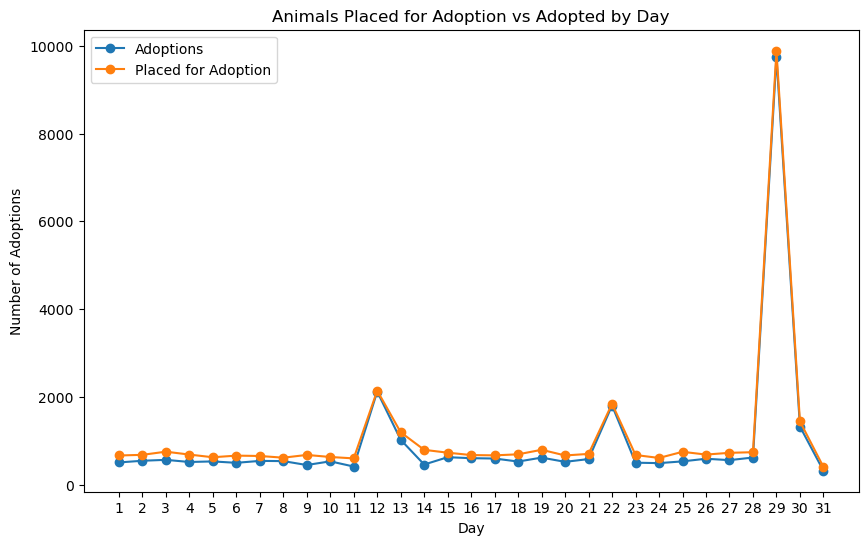

In [25]:
daily_adoptions = adopted.groupby('day_status_change')['id'].count()
daily_published = df.groupby('day_published')['id'].count()

plt.figure(figsize=(10, 6))

daily_adoptions.plot(kind='line', marker='o', label='Adoptions')
daily_published.plot(kind='line', marker='o', label='Placed for Adoption')

plt.title('Animals Placed for Adoption vs Adopted by Day')
plt.xlabel('Day')
plt.ylabel('Number of Adoptions')
plt.xticks(range(1, 32)) 
plt.legend()

plt.show()

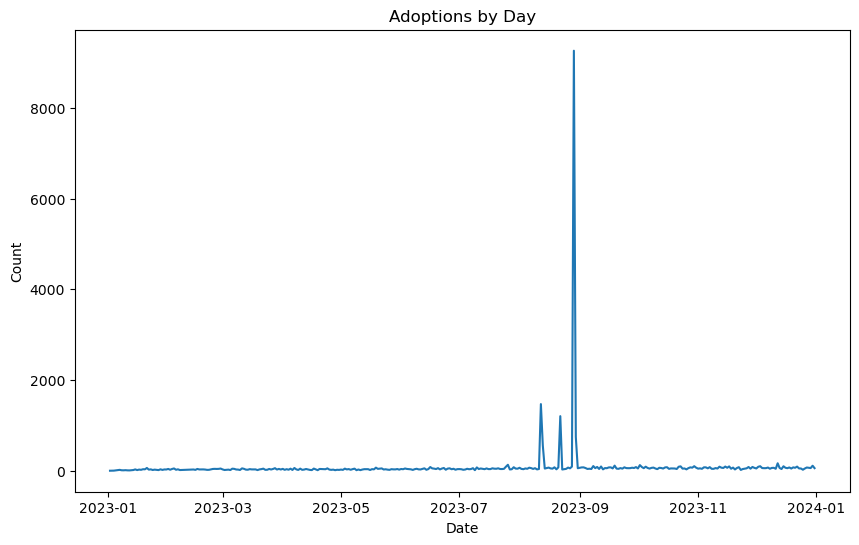

,status_change_date,count
0,2023-01-02,2
1,2023-01-03,2
2,2023-01-04,4
3,2023-01-05,9
4,2023-01-06,14
...,...,...
359,2023-12-27,73
360,2023-12-28,66
361,2023-12-29,61
362,2023-12-30,112


In [26]:
date_adoptions = adopted.groupby('status_change_date')['id'].count().reset_index(name='count')
date_published = df.groupby('published_date')['id'].count().reset_index(name='count')

date_adoptions['status_change_date'] = pd.to_datetime(date_adoptions['status_change_date'])

plt.figure(figsize=(10, 6))

sns.lineplot(x='status_change_date', y='count', data=date_adoptions)
plt.title('Adoptions by Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

date_adoptions

## Q4. How do adoption rates vary across different regions within TN?

How many cities in TN were animals available for adoptions?

In [27]:
df['contact.address.city'].nunique()

156

What is the adoption rate % per city?

In [28]:
# Group and count for adopted and total
total_by_city = df.groupby('contact.address.city')['id'].count().reset_index(name='count_total')
adopted_by_city = adopted.groupby('contact.address.city')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
city_ar = pd.merge(total_by_city, adopted_by_city, on='contact.address.city', how='outer')

# Add new column and calculate adoption rate + round
city_ar['adoption rate %'] = round((city_ar['count_adopted'] / city_ar['count_total']) * 100, 2)
city_ar = city_ar.sort_values('count_total', ascending=False)

print(city_ar.head(10)) # Top 10 cities
print(city_ar.tail(10)) # Bottom 10

    contact.address.city  count_total  count_adopted  adoption rate %
60           Greeneville        10371        10285.0            99.17
132          Shelbyville         2098         2061.0            98.24
105            Nashville         2027         1715.0            84.61
34            Crossville         2021         1841.0            91.09
130          Sevierville          874          854.0            97.71
21           Chattanooga          860          650.0            75.58
77             Knoxville          851          604.0            70.98
10           Blountville          783          750.0            95.79
101         Mount Juliet          695          507.0            72.95
51              Franklin          685          516.0            75.33
    contact.address.city  count_total  count_adopted  adoption rate %
145       Tellico Plains            1            NaN              NaN
144              Telford            1            1.0            100.0
42                  

What is the adoption rate per county?

In [29]:
# Import US Zips from https://simplemaps.com/data/us-zips
zipcodes = pd.read_csv('..//data/uszips.csv')
print(zipcodes.shape)
#zipcodes.head()

(33788, 18)


In [30]:
# Subset on state_name to get only TN data
zips = zipcodes[zipcodes['state_name'] == 'Tennessee']

# Count zips
zips['state_id'].count()

636

In [31]:
# Merge dataframes together on postcode
loc_df = pd.merge(df, zips, left_on='contact.address.postcode', right_on='zip', how='left')

In [32]:
#loc_df.head(1)

In [33]:
#loc_df.columns

In [34]:
# Drop unnecessary columns
drop = [
    'organization_id', 'url', 'tags', 'name', 
    'description', 'attributes.spayed_neutered',
    'attributes.house_trained', 'attributes.declawed',
    'attributes.special_needs', 'attributes.shots_current',
    'environment.children', 'environment.dogs', 'environment.cats', 
    'contact.address.state', 'zip', 'city', 'state_id', 'state_name', 
    'zcta', 'parent_zcta', 'county_fips',  
    'county_weights', 'county_fips_all', 'imprecise', 'military',
    'timezone'
]
loc_df.drop(drop, axis=1, inplace=True)

In [35]:
#loc_df.columns

In [36]:
total_by_county = loc_df.groupby('county_name')['id'].count().reset_index(name='count_total').sort_values('count_total', ascending=False)

adopted_loc = loc_df[loc_df['status'] == 'adopted']
adopted_by_county = adopted_loc.groupby('county_name')['id'].count().reset_index(name='count_adopted').sort_values('count_adopted', ascending=False)

# Merge two dataframes together
county_ar = pd.merge(total_by_county, adopted_by_county, on='county_name', how='outer')

# Add new column and calculate adoption rate + round
county_ar['adoption rate %'] = round((county_ar['count_adopted'] / county_ar['count_total']) * 100, 2)
county_ar = county_ar.sort_values('count_adopted', ascending=False)

print(county_ar.head(10)) # Top 10
print(county_ar.tail(10)) # Bottom 10 - Note - bottom 10 had no adoptions despite the number of animals

  county_name  count_total  count_adopted  adoption rate %
0      Greene        10395        10336.0            99.43
1    Davidson         2962         2693.0            90.92
2     Bedford         2090         2062.0            98.66
3      Shelby         1309         1087.0            83.04
6      Sevier          877          872.0            99.43
4   Jefferson          902          855.0            94.79
5    Sullivan          900          847.0            94.11
8  Williamson          826          713.0            86.32
7      Wilson          857          702.0            81.91
9        Knox          781          662.0            84.76
   county_name  count_total  count_adopted  adoption rate %
49      Carter           49            NaN              NaN
54        Rhea           33            NaN              NaN
58    Campbell           29            NaN              NaN
59     Lincoln           26            NaN              NaN
62       Lewis           20            NaN         

By Region

In [37]:
# Put counties in respective regions manually into dictionary
# Copied from wiki https://en.wikipedia.org/wiki/Grand_Divisions_of_Tennessee
east = {
    'Anderson': 'East', 'Bledsoe': 'East', 'Blount': 'East', 'Bradley': 'East', 
    'Campbell': 'East', 'Carter': 'East', 'Claiborne': 'East','Cocke': 'East', 
    'Cumberland': 'East', 'Grainger': 'East', 'Greene': 'East', 'Hamblen': 'East',
    'Hamilton': 'East','Hancock': 'East','Hawkins': 'East', 'Jefferson': 'East', 
    'Johnson': 'East', 'Knox': 'East', 'Loudon': 'East', 'Marion': 'East', 
    'McMinn': 'East', 'Meigs': 'East', 'Monroe': 'East', 'Morgan': 'East',
    'Polk': 'East', 'Rhea': 'East', 'Roane': 'East', 'Scott': 'East', 
    'Sevier': 'East', 'Sullivan': 'East', 'Unicoi': 'East', 'Union': 'East', 
    'Washington': 'East'
}

middle = {
    'Bedford': 'Middle', 'Cannon': 'Middle', 'Cheatham': 'Middle', 'Clay': 'Middle',
    'Coffee': 'Middle', 'Davidson': 'Middle', 'DeKalb': 'Middle', 'Dickson': 'Middle',
    'Fentress': 'Middle', 'Franklin': 'Middle', 'Giles': 'Middle', 'Grundy': 'Middle',
    'Hickman': 'Middle', 'Houston': 'Middle', 'Humphreys': 'Middle', 'Jackson': 'Middle',
    'Lawrence': 'Middle', 'Lewis': 'Middle', 'Lincoln': 'Middle', 'Macon': 'Middle',
    'Marshall': 'Middle', 'Maury': 'Middle', 'Montgomery': 'Middle', 'Moore': 'Middle',
    'Overton': 'Middle', 'Perry': 'Middle', 'Pickett': 'Middle', 'Putnam': 'Middle',
    'Robertson': 'Middle', 'Rutherford': 'Middle', 'Sequatchie': 'Middle', 'Smith': 'Middle',
    'Stewart': 'Middle', 'Sumner': 'Middle', 'Trousdale': 'Middle', 'Van Buren': 'Middle',
    'Warren': 'Middle', 'Wayne': 'Middle', 'White': 'Middle', 'Williamson': 'Middle',
    'Wilson': 'Middle'
}

west = {
    'Benton': 'West', 'Carroll': 'West', 'Chester': 'West', 'Crockett': 'West',
    'Decatur': 'West', 'Dyer': 'West', 'Fayette': 'West', 'Gibson': 'West',
    'Hardeman': 'West', 'Hardin': 'West', 'Haywood': 'West', 'Henderson': 'West',
    'Henry': 'West', 'Lake': 'West', 'Lauderdale': 'West', 'Madison': 'West',
    'McNairy': 'West', 'Obion': 'West', 'Shelby': 'West', 'Tipton': 'West',
    'Weakley': 'West'
}

In [38]:
#test = loc_df[['county_name']]

In [39]:
# Create function that adds returns region if county is in dictionaries east, west, middle
def add_county(county):
    if county in east:
        return 'East'
    elif county in middle:
        return 'Middle'
    elif county in west:
        return 'West'

In [40]:
# test['region'] = test['county_name'].apply(add_county)
# test.groupby('region')['county_name'].count()

In [41]:
# Create new column and apply function 
loc_df['region'] = loc_df['county_name'].apply(add_county)

# Check 
loc_df[['county_name', 'region']]

#loc_df.info()

# Convert region to string
loc_df['region'] = loc_df['region'].astype('string')

#loc_df.info()

In [42]:
loc_df.columns

Index(['id', 'type', 'species', 'age', 'gender', 'size', 'coat', 'status',
       'status_changed_at', 'published_at', 'breeds.primary',
       'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'colors.primary',
       'colors.secondary', 'colors.tertiary', 'contact.address.city',
       'contact.address.postcode', 'published_date', 'status_change_date',
       'adoption_time', 'month_published', 'day_published', 'year_published',
       'month_status_change', 'day_status_change', 'year_status_change', 'lat',
       'lng', 'population', 'density', 'county_name', 'county_names_all',
       'region'],
      dtype='object')

In [43]:
adopted_loc = loc_df[loc_df['status'] == 'adopted']

In [44]:
# Group
total_by_region = loc_df.groupby('region')['id'].count().reset_index(name='count_total')
adopted_by_region = adopted_loc.groupby('region')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
region_ar = pd.merge(total_by_region, adopted_by_region, on='region', how='outer')

# Add new column and calculate adoption rate + round
region_ar['adoption rate %'] = round((region_ar['count_adopted'] / region_ar['count_total']) * 100, 2)
region_ar = region_ar.sort_values('count_adopted', ascending=False)
#region_ar.info()

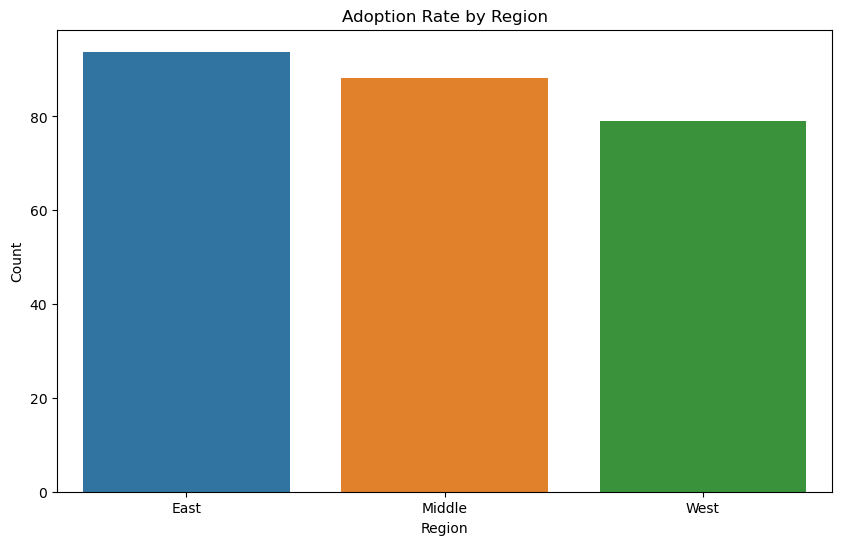

In [45]:
plt.figure(figsize=(10, 6))

sns.barplot(x='region', y='adoption rate %', data=region_ar)

plt.title('Adoption Rate by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.show()

## What is the distribution of animals adopted vs animals who were not adopted in 2023?

In [46]:
df.head()

,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,published_date,status_change_date,adoption_time,month_published,day_published,year_published,month_status_change,day_status_change,year_status_change
0,70208019.0,TN801,https://www.petfinder.com/cat/madame-kitty-702...,Cat,Cat,Young,Female,Medium,Short,<NA>,Madame Kitty,"Meet Madame Kitty, a 2 year old DSH cat. She i...",adopted,2024-01-22 13:31:21+00:00,2023-12-31 23:19:08+00:00,Domestic Short Hair,<NA>,False,False,Calico,<NA>,<NA>,True,True,0.0,False,True,True,<NA>,<NA>,Chattanooga,TN,37421.0,2023-12-31,2024-01-22,22.0,12.0,31.0,2023.0,1.0,22.0,2024.0
1,70207823.0,TN597,https://www.petfinder.com/cat/truffles-7020782...,Cat,Cat,Baby,Female,Small,Short,"Friendly, Affectionate, Playful",Truffles,Truffles is the new kid on the block. This pr...,adopted,2024-01-18 00:05:29+00:00,2023-12-31 22:40:37+00:00,Dilute Calico,<NA>,True,False,Dilute Calico,Brown / Chocolate,<NA>,True,True,0.0,False,True,True,True,True,Lyles,TN,37098.0,2023-12-31,2024-01-18,18.0,12.0,31.0,2023.0,1.0,18.0,2024.0
2,70207450.0,TN369,https://www.petfinder.com/cat/teetee-70207450/...,Cat,Cat,Baby,Male,Small,Short,"Friendly, Affectionate, Playful",Teetee,Meet TeeTee! He is an extremely adorable and s...,adopted,2024-01-06 00:56:45+00:00,2023-12-31 21:45:47+00:00,Domestic Short Hair,<NA>,False,False,Tabby (Gray / Blue / Silver),<NA>,<NA>,True,True,0.0,False,True,<NA>,True,True,Nashville,TN,37214.0,2023-12-31,2024-01-06,6.0,12.0,31.0,2023.0,1.0,6.0,2024.0
3,70203376.0,TN90,https://www.petfinder.com/cat/ac-25055-7020337...,Cat,Cat,Young,Male,Medium,<NA>,<NA>,Ac 25055,<NA>,adopted,2023-12-31 10:03:59+00:00,2023-12-31 10:03:58+00:00,Domestic Short Hair,<NA>,False,False,<NA>,<NA>,<NA>,False,False,0.0,False,False,<NA>,<NA>,<NA>,Greeneville,TN,37745.0,2023-12-31,2023-12-31,0.0,12.0,31.0,2023.0,12.0,31.0,2023.0
4,70203375.0,TN90,https://www.petfinder.com/cat/ac-25035-7020337...,Cat,Cat,Young,Female,Medium,<NA>,<NA>,Ac 25035,<NA>,adopted,2023-12-31 10:03:57+00:00,2023-12-31 10:03:56+00:00,Domestic Short Hair,<NA>,False,False,<NA>,<NA>,<NA>,False,False,0.0,False,False,<NA>,<NA>,<NA>,Greeneville,TN,37745.0,2023-12-31,2023-12-31,0.0,12.0,31.0,2023.0,12.0,31.0,2023.0


## Q5. What are the key factors influencing the adoption dynamics?

### Pivoting to just cats and dogs

In [47]:
# Create dataframes for just dogs and cats
dogs = df[df['species'] == 'Dog']
cats = df[df['species'] == 'Cat']